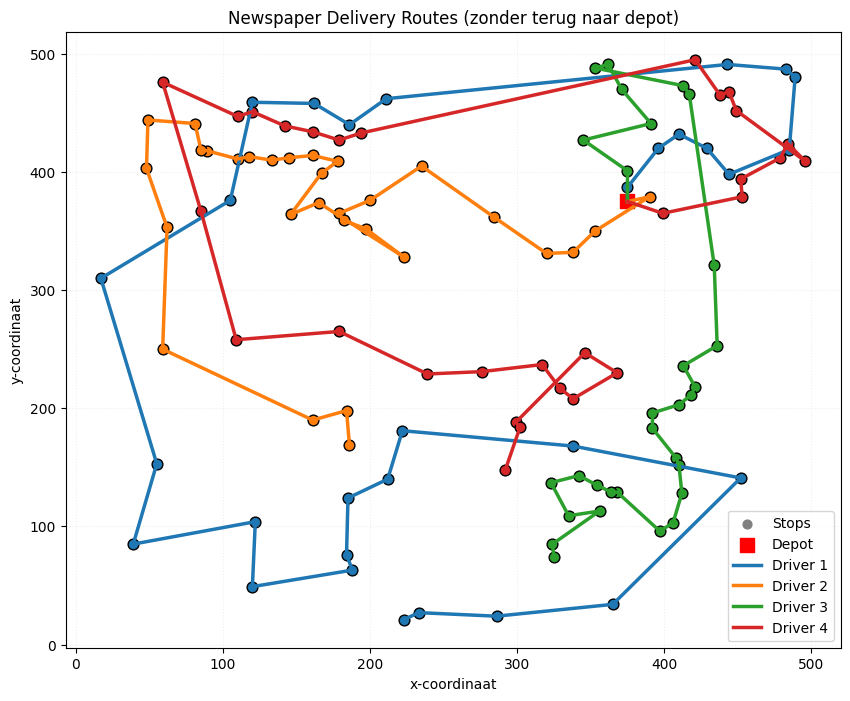

Driver 1 heeft 30 stops, totale lengte: 1901.09
Driver 2 heeft 30 stops, totale lengte: 1013.73
Driver 3 heeft 30 stops, totale lengte: 861.37
Driver 4 heeft 30 stops, totale lengte: 1329.39


'\n'

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Data inlezen
df = pd.read_excel("newspaper problem instance.xlsx")

# Parameters
drivers = 4
stops_per_driver = 30
depot = 0 # Start locatie 0

# Coordinaten inlezen 
coordinates = np.array([(df.iloc[i]["xcoord"], df.iloc[i]["ycoord"]) for i in range(len(df))])
num_locations = len(coordinates)
num_stops = num_locations - 1

"""
Leest voor elke rij in het Excel-bestand het paar (xcoord, ycoord).
Zet die lijst om naar een NumPy-array voor handigheid.
num_locations = totaal aantal rijen (inclusief depot).
num_stops = alles behalve het depot (dus een minder).
"""
# Afstandsmatrix 
distance_matrix = {
    (i, j): float(np.linalg.norm(coordinates[i] - coordinates[j]))
    for i, j in itertools.product(range(num_locations), repeat=2)
}

"""
Maakt een dictionary waarin elke sleutel (i, j) is, en de waarde de afstand tussen locatie i en j.
np.linalg.norm(a - b) berekent de Euclidische afstand (wortel van kwadratenverschil).
itertools.product(..., repeat=2) zorgt voor alle combinaties van i en j, inclusief (i, i).
bijv, distance_matrix[(2, 5)] → afstand van punt 2 naar punt 5.
"""

# Hulpfunctie: lengte van een tour (zonder terug naar depot) 
def tour_length(tour):
    if not tour:
        return 0
    total = distance_matrix[(depot, tour[0])]
    for a, b in zip(tour[:-1], tour[1:]):
        total += distance_matrix[(a, b)]
    return total

"""
Berekent de totale afstand van een tour zonder terug te keren naar het depot.
Eerst: afstand van depot -> eerste stop.
Daarna: som van alle opeenvolgende afstanden tussen stops.
Geeft de totale lengte terug.
"""

# Marginale kost (zonder terug naar depot)
def marginal_append_cost(current_end, tour_is_empty, j):
    if tour_is_empty:
        return distance_matrix[(depot, j)]
    return distance_matrix[(current_end, j)]

"""
Deze functie berekent wat het extra kost om een nieuwe stop j toe te voegen aan het einde van een bestaande route:
Als de route nog leeg is -> afstand van depot -> j.
Anders de afstand van laatste stop naar j.
""" 

# Greedy  
unassigned = set(range(1, num_locations))
tours = [[] for _ in range(drivers)]
current_end = [depot] * drivers
tour_lengths = [0.0] * drivers

"""
unassigned: alle nog niet toegewezen stops (1 t/m laatste).
tours: lege lijst per chauffeur.
current_end: waar elke chauffeur zich momenteel bevindt (start bij depot).
tour_lengths: huidige routeafstand per chauffeur.
"""

step = 1
while unassigned:
    candidates = [d for d in range(drivers) if len(tours[d]) < stops_per_driver]
    d = min(candidates, key=lambda k: tour_lengths[k]) 
    """
    Kies de chauffeur met kortste huidige route, wanneer ze onder 30 stops zitten, worden ze gekozen onder de loop totdat
    alle chauffeurs zijn gekozen
    """

    best_j = None
    best_delta = float("inf")
    for j in unassigned:
        delta = marginal_append_cost(current_end[d], len(tours[d]) == 0, j)
        if delta < best_delta:
            best_delta = delta
            best_j = j

    tours[d].append(best_j)
    unassigned.remove(best_j)
    if len(tours[d]) == 1:
        tour_lengths[d] = distance_matrix[(depot, best_j)]
    else:
        end = current_end[d]
        tour_lengths[d] += distance_matrix[(end, best_j)]
    current_end[d] = best_j
    step += 1

# Visualisaltion
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c="gray", s=40, label="Stops")
plt.scatter(coordinates[0, 0], coordinates[0, 1], c="red", s=100, marker="s", label="Depot")

colors = plt.cm.tab10.colors
for d, tour in enumerate(tours):
    if not tour:
        continue
    path = [depot] + tour
    plt.plot(coordinates[path, 0], coordinates[path, 1],
             color=colors[d % len(colors)], linewidth=2.5, label=f"Driver {d+1}")
    plt.scatter(coordinates[tour, 0], coordinates[tour, 1],
                s=60, color=colors[d % len(colors)], edgecolors="black")

plt.title("Newspaper Delivery Routes (zonder terug naar depot)")
plt.xlabel("x-coordinaat")
plt.ylabel("y-coordinaat")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.2)
plt.show()

# Results!!!!!!!!
for d, t in enumerate(tours, start=1):
    print(f"Driver {d} heeft {len(t)} stops, totale lengte: {tour_length(t):.2f}")

"""
"""